In [412]:
# importing all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import ttest_power
import math
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib
import statsmodels.stats.api as sm

# Problem 1

Wholesale Customers Analysis

Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [413]:
#Importing the dataset 
df = pd.read_csv('H:\Downloads\Great learning\Statistics\PROJECT\Wholesale+Customers+Data.csv')

In [414]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


#### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?


### Ans. 
Inorder to summarize the given data describe() function can be used, include=all is used to summarize all the available columns in our dataset.

In [416]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


#### lets find the most spending and least spending regions and channels

Analysis of spending for regions

In [417]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

#### The most spending is done at other region and least spending is done at Oporto region.

Analysis of spending for channels

In [418]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

#### The most spending is done at Hotel channel and least spending is at Retail channel.

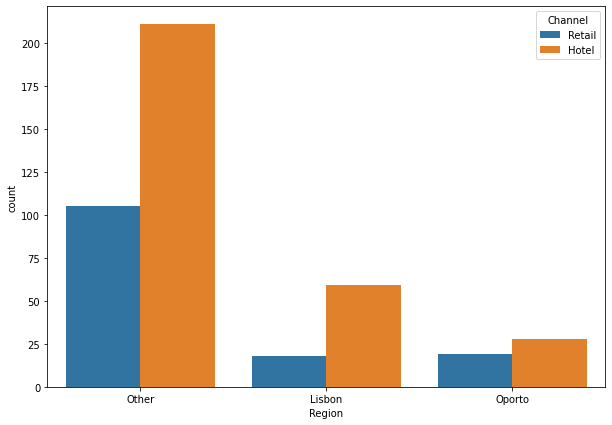

In [419]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Region', hue='Channel');

#### From the above Bar graph, we can conclude the following:
#### i.	The most spending is done at other region and the Hotel channel.
#### ii.The least spending is done at Oporto region and the Retail channel.

#### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

<Figure size 720x504 with 0 Axes>

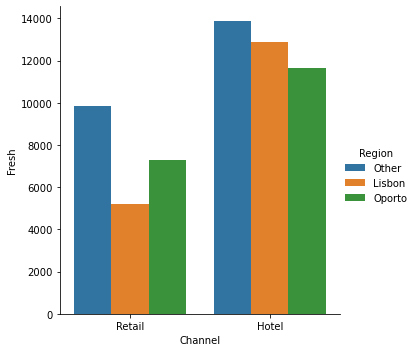

In [420]:
plt.figure(figsize=(10,7))
sns.catplot(data=df,x='Channel',y='Fresh',hue='Region',kind='bar',ci=None);

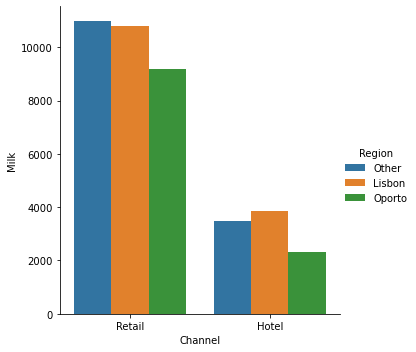

In [421]:
sns.catplot(data=df,x='Channel',y='Milk',hue='Region',kind='bar',ci=None);

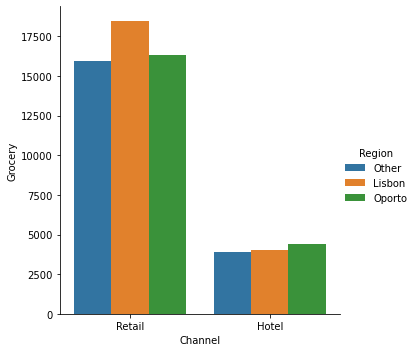

In [422]:
sns.catplot(data=df,x='Channel',y='Grocery',hue='Region',kind='bar',ci=None);

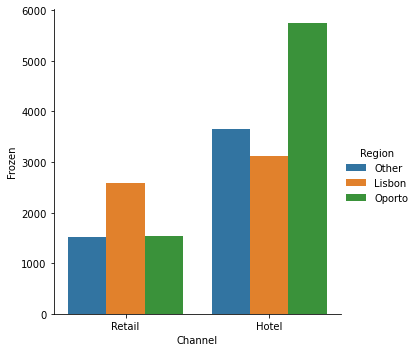

In [423]:
sns.catplot(data=df,x='Channel',y='Frozen',hue='Region',kind='bar',ci=None);

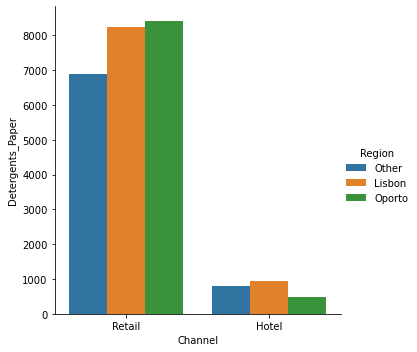

In [424]:
sns.catplot(data=df,x='Channel',y='Detergents_Paper',hue='Region',kind='bar',ci=None);

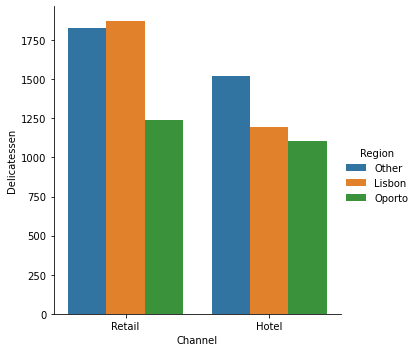

In [425]:
sns.catplot(data=df,x='Channel',y='Delicatessen',hue='Region',kind='bar',ci=None);

#### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

#### The coefficient of variation(CV = σ / μ) measures how consistent the values of our data are, it is calculated below for all 6items of our dataset. If the CV is lower we can conclude the consistency is high, and vice versa. 

#### The Delicatessen item is showing an inconsistent behaviour with (CV of 1.847304).
#### The Fresh items are showing a consistent behaviour with (CV of 1.052720).


In [426]:
cv = lambda x: np.std(x) / np.mean(x)

In [427]:
cv(df)

C:\Users\balar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\balar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\balar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=d

Buyer/Spender       0.576040
Fresh               1.052720
Milk                1.271851
Grocery             1.193815
Frozen              1.578536
Detergents_Paper    1.652766
Delicatessen        1.847304
dtype: float64

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

#### boxplot() function can be used to find out if there are any outliers in our dataset.
#### From the below boxplot, It is clear that we have outliers present in our data.

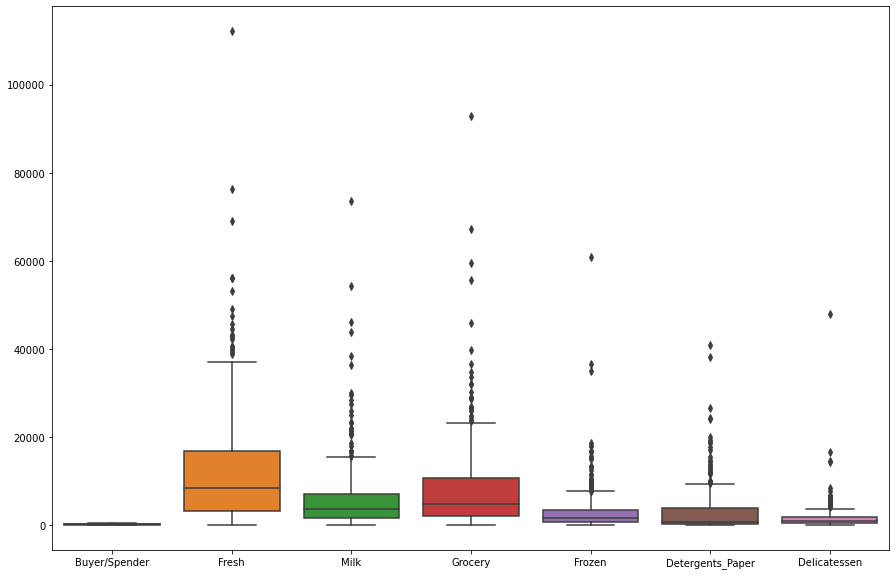

In [428]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df);

# Problem no.2
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates.

In [429]:
#Importing the dataset 
df2 = pd.read_csv('H:\Downloads\Great learning\Statistics\PROJECT\Survey-1.csv')
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [430]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [431]:
df2.describe(include='all')

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

In [432]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 2.1.2. Gender and Grad Intention

In [433]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 2.1.3. Gender and Employment

In [434]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 2.1.4. Gender and Computer

In [435]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

In [436]:
Total_students = df2.ID.nunique()
print('The total number of students at CMSU is:', Total_students)

The total number of students at CMSU is: 62


In [437]:
df2.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [438]:
No_of_Male_Students = 29
No_of_Female_Students = 33

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [439]:
Male_students_probability = (No_of_Male_Students/Total_students)
print('The probability that a randomly selected CMSU student will be male is', Male_students_probability*100,'%')

The probability that a randomly selected CMSU student will be male is 46.774193548387096 %


### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [440]:
Female_students_probability = (No_of_Female_Students/Total_students)
print('The probability that a randomly selected CMSU student will be Female is', Female_students_probability*100,'%')

The probability that a randomly selected CMSU student will be Female is 53.2258064516129 %


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [441]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [442]:
Accounting_Male = 4/No_of_Male_Students
CIS_Male = 1/No_of_Male_Students
Economics_Finance_Male = 4/No_of_Male_Students
International_Business_Male = 2/No_of_Male_Students
Management_Male = 6/No_of_Male_Students
Other_Male = 4/No_of_Male_Students
Retailing_Marketing_Male = 5/No_of_Male_Students
Undecided_Male = 3/No_of_Male_Students

print ('The probability of male students in Accounting is: ',Accounting_Male*100,'%')
print ('The probability of male students in CIS is: ',CIS_Male*100,'%')
print ('The probability of male students in Economics/Finance is: ',Economics_Finance_Male*100,'%')
print ('The probability of male students in International Business is: ',International_Business_Male*100,'%')
print ('The probability of male students in Management is: ',Management_Male*100,'%')
print ('The probability of male students in Other is: ',Other_Male*100,'%')
print ('The probability of male students in Retailing/Marketing is: ',Retailing_Marketing_Male*100,'%')
print ('The probability of male students in Undecided is: ',Undecided_Male*100,'%')

The probability of male students in Accounting is:  13.793103448275861 %
The probability of male students in CIS is:  3.4482758620689653 %
The probability of male students in Economics/Finance is:  13.793103448275861 %
The probability of male students in International Business is:  6.896551724137931 %
The probability of male students in Management is:  20.689655172413794 %
The probability of male students in Other is:  13.793103448275861 %
The probability of male students in Retailing/Marketing is:  17.24137931034483 %
The probability of male students in Undecided is:  10.344827586206897 %


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [443]:
Accounting_Female = 3/No_of_Female_Students
CIS_Female = 3/No_of_Female_Students
Economics_Finance_Female = 7/No_of_Female_Students
International_Business_Female = 4/No_of_Female_Students
Management_Female = 4/No_of_Female_Students
Other_Female = 3/No_of_Female_Students
Retailing_Marketing_Female = 9/No_of_Female_Students
Undecided_Female = 0/No_of_Female_Students

print ('The probability of Female students in Accounting is: ',Accounting_Female*100,'%')
print ('The probability of Female students in CIS is: ',CIS_Female*100,'%')
print ('The probability of Female students in Economics/Finance is: ',Economics_Finance_Female*100,'%')
print ('The probability of Female students in International Business is: ',International_Business_Female*100,'%')
print ('The probability of Female students in Management is: ',Management_Female*100,'%')
print ('The probability of Female students in Other is: ',Other_Female*100,'%')
print ('The probability of Female students in Retailing/Marketing is: ',Retailing_Marketing_Female*100,'%')
print ('The probability of Female students in Undecided is: ',Undecided_Female*100,'%')


The probability of Female students in Accounting is:  9.090909090909092 %
The probability of Female students in CIS is:  9.090909090909092 %
The probability of Female students in Economics/Finance is:  21.21212121212121 %
The probability of Female students in International Business is:  12.121212121212121 %
The probability of Female students in Management is:  12.121212121212121 %
The probability of Female students in Other is:  9.090909090909092 %
The probability of Female students in Retailing/Marketing is:  27.27272727272727 %
The probability of Female students in Undecided is:  0.0 %


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [444]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [445]:
Male_intends_Graduation = ((17/No_of_Male_Students)*(No_of_Male_Students/Total_students))
print('The probability of a randomly chosen male student who intends to graduate is',Male_intends_Graduation*100,'%')

The probability of a randomly chosen male student who intends to graduate is 27.419354838709676 %


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [446]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [447]:
Female_without_Laptop = ((4/No_of_Female_Students)*(No_of_Female_Students/Total_students))
print('The probability of a randomly chosen female student without laptop is',Female_without_Laptop*100,'%')

The probability of a randomly chosen female student without laptop is 6.451612903225806 %


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [448]:
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [449]:
p_male=(No_of_Male_Students/Total_students)
p_full_time_employed=(10/Total_students)
p_male_full_time_employed=(7/Total_students)
print('The probability that a randomly chosen student is a male or has full-time employment is',(p_male+p_full_time_employed-p_male_full_time_employed)*100,'%')

The probability that a randomly chosen student is a male or has full-time employment is 51.61290322580645 %


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [450]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [451]:
female_International_Business=(4/No_of_Female_Students)
female_Management=(4/No_of_Female_Students)
print('The probability a female student is a major in International Business or Management is',(female_International_Business+female_Management)*100,'%')

The probability a female student is a major in International Business or Management is 24.242424242424242 %


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [452]:
pd.crosstab(df2['Gender'],df2['Grad Intention']).iloc[[0,1],[0,2]]

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [453]:
#p(A) 
A = ((11+17)/Total_students)
#p(B)
B = (No_of_Female_Students/Total_students)
#probability of being female and intending to graduate(AnB)
AB = ((11/No_of_Female_Students)*(No_of_Female_Students/Total_students))

In [454]:
if (AB==(A*B)):
    print('The graduate intention and being female are independent events')
else:
    print('The graduate intention and being female are not independent events')

The graduate intention and being female are not independent events


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

In [455]:
df2[['GPA','Salary','Spending','Text Messages']]

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [456]:
GPA_lessthan_3 = df2[df2["GPA"] < 3]
print('The probability that a students GPA is less than 3 is',((GPA_lessthan_3.GPA.value_counts().sum())/Total_students)*100,'%')

The probability that a students GPA is less than 3 is 27.419354838709676 %


### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [457]:
pd.crosstab(df2['Gender'],df2['Salary']>=50).T

Gender,Female,Male
Salary,,
False,15,15
True,18,14


In [458]:
print('The probability that a randomly selected male earns 50 or more is',((14/No_of_Male_Students)*100,'%'))
print('The probability that a randomly selected female earns 50 or more is',((18/No_of_Female_Students)*100,'%'))

The probability that a randomly selected male earns 50 or more is (48.275862068965516, '%')
The probability that a randomly selected female earns 50 or more is (54.54545454545454, '%')


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [459]:
df2[['GPA','Salary','Spending','Text Messages']].describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


#### The distribution of GPA is not normally distributed in our dataset and has multiple modes. The mean is 3.129032, median is 3.15 and has multiple modes (3, 3.1, 3.4).

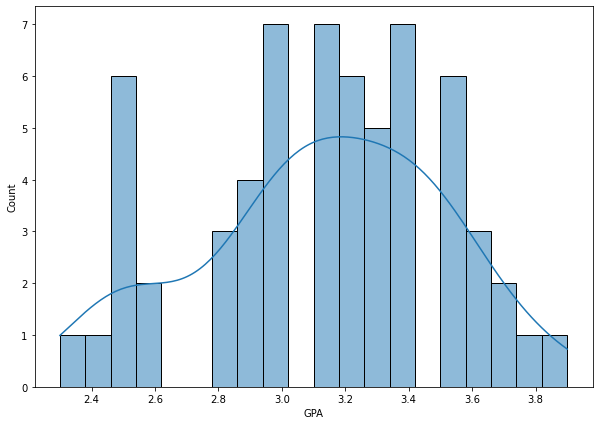

In [460]:
plt.figure(figsize=(10,7))
sns.histplot(data=df2, x='GPA',bins=20, kde=True);

#### The distribution of Salary is not normally distributed in our dataset. It is right skewed, the mean is 48.548387, median is 50.00 and mode is 40

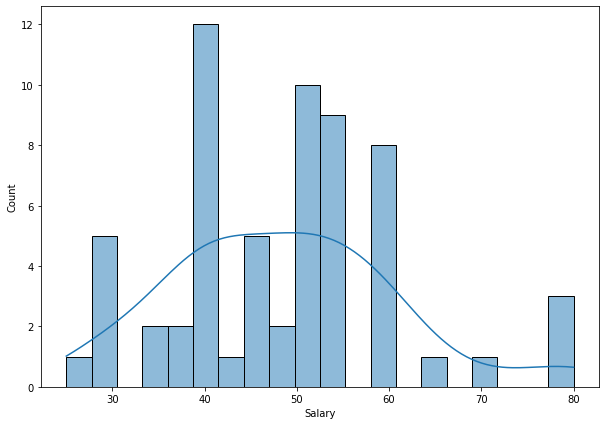

In [461]:
plt.figure(figsize=(10,7))
sns.histplot(data=df2, x='Salary',bins=20, kde=True);

#### The distribution of Spending is not normally distributed in our dataset. It is right skewed, the mean is 482.016129, median is 500.00 and mode is 500

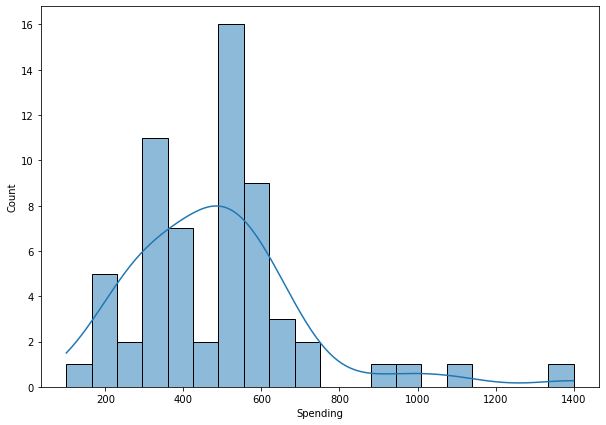

In [462]:
plt.figure(figsize=(10,7))
sns.histplot(data=df2, x='Spending',bins=20, kde=True);

#### The distribution of Text Messages is not normally distributed in our dataset. It is right skewed, the mean is 246.209677, median is 200.00 and mode is 300

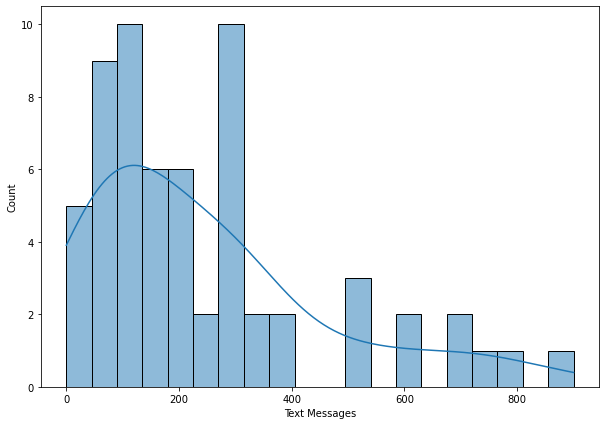

In [463]:
plt.figure(figsize=(10,7))
sns.histplot(data=df2, x='Text Messages',bins=20, kde=True);

# Problem no.3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [464]:
df3=pd.read_csv('H:\Downloads\Great learning\Statistics\PROJECT\A+&+B+shingles.csv')
df3.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [465]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [466]:
df3.describe(include='all')

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [467]:
df3

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [468]:
Shingle_A = df3['A'] 
Shingle_B = df3['B'].dropna()

#### Step 1: Define null and alternative hypotheses for our problem,
Null hypothesis, H0: µ <= 0.35

Alternative hypothesis, H1: µ > 0.35


#### Step 2: Decide the significance level
Here we select α = 0.05.


In [469]:
print("The sample size for the shingle A is",len(Shingle_A))
print("The sample size for the shingle B is",len(Shingle_B))

The sample size for the shingle A is 36
The sample size for the shingle B is 31


#### Step 3: Identify the test statistic
We do not know the population standard deviation and n = 36 for shingle A and n = 31 for shingle B. So we use the t distribution and the tSTAT test statistic.

#### Step 4: Calculate the p - value and test statistic


In [470]:
# one sample t-test for Shingle_A
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(Shingle_A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, (p_value/2)))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [471]:
# p_value > 0.05 => null hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis for Shingle_A since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis  for Shingle_A since p value > Level of significance') 

print ("Our one-sample t-test p-value=", (p_value/2))

Level of significance: 0.05
We have no evidence to reject the null hypothesis  for Shingle_A since p value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513


In [472]:
# one sample t-test for Shingle_B
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(Shingle_B, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, (p_value/2)))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191813 


In [473]:
# p_value < 0.05 => null hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis for Shingle_B since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis for Shingle_B since p value > Level of significance') 

print ("Our one-sample t-test p-value=", (p_value/2))

Level of significance: 0.05
We have evidence to reject the null hypothesis for Shingle_B since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191813


#### Step 5 Decide to reject or accept null hypothesis

In [474]:
print('We have no evidence to reject the null hypothesis for Shingle_A')
print('We have evidence to reject the null hypothesis for Shingle_B')

We have no evidence to reject the null hypothesis for Shingle_A
We have evidence to reject the null hypothesis for Shingle_B


#### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Step 1: Define null and alternative hypotheses for our problem,
Null hypothesis, H0: µ(A) = µ(B)

Alternative hypothesis, H1: µ(A) ≠ µ(B)

#### Step 2: Decide the significance level
Here we select α = 0.05.

#### Step 3: Identify the test statistic

We need to perform t-test(two-sample) for both Shingle-A and Shingle-B

#### Step 4: Calculate the p - value and test statistic

In [475]:
from   scipy.stats import ttest_1samp, ttest_ind

In [476]:
Shingle_A = df3['A'] 
Shingle_B = df3['B'].dropna()

In [477]:
stats.ttest_ind(a=Shingle_A,b=Shingle_B, equal_var=True)
print('tstat',t_statistic)    
print('P Value',p_value/2)

tstat -3.1003313069986995
P Value 0.0020904774003191813


In [478]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if (p_value/2) < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", (p_value/2))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191813


#### The population means for shingles A and B are not equal.